# Kaggle submitter
<img src="https://cdn-images-1.medium.com/max/800/0*hP7d7lmvx0QM_wFM.png" alt="Kaggle Logo" style="width: 200px;"/>

To create token login to kaggle.com, then click on _My Profile_, _Edit Profile_ and _Create New API Token_ to download __kaggle.json__ and copy it to
`C:\Users\<Windows-username>\.kaggle\kaggle.json` on Windows
`chmod 600 ~/.kaggle/kaggle.json` on Linux

In [145]:
import json
import random
import zipfile
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kaggle.api.kaggle_api_extended import KaggleApi

warnings.filterwarnings("ignore")

random.seed(1)

%matplotlib inline

# Set the competition here
kaggle_selected_competition = 'elo-merchant-category-recommendation'
kaggle_user_name = 'Zol-S'
kaggle_leaderboard_ascending = True

## Login

In [10]:
with open('credentials/kaggle.json') as f:
    kaggle_credentials = json.load(f)

api = KaggleApi(kaggle_credentials)
api.authenticate()

## Competition list

In [38]:
api.competitions_list()

[digit-recognizer,
 titanic,
 house-prices-advanced-regression-techniques,
 imagenet-object-localization-challenge,
 competitive-data-science-predict-future-sales,
 two-sigma-financial-news,
 LANL-Earthquake-Prediction,
 tmdb-box-office-prediction,
 dont-overfit-ii,
 data-science-for-good-careervillage,
 gendered-pronoun-resolution,
 santander-customer-transaction-prediction,
 womens-machine-learning-competition-2019,
 mens-machine-learning-competition-2019,
 histopathologic-cancer-detection,
 petfinder-adoption-prediction,
 vsb-power-line-fault-detection,
 microsoft-malware-prediction,
 humpback-whale-identification,
 elo-merchant-category-recommendation]

## Public Leaderboard

In [68]:
api.competition_leaderboard_cli(kaggle_selected_competition, competition_opt='m', path='downloads/', download='True')

  0%|          | 0.00/320k [00:00<?, ?B/s]

100%|██████████| 320k/320k [00:00<00:00, 708kB/s]

In [72]:
def read_zip_file(zippath, filename):
    zf = zipfile.ZipFile(zippath)
    return pd.read_csv(zf.open(filename))

In [116]:
df_lb = read_zip_file('downloads/' + kaggle_selected_competition + '.zip', kaggle_selected_competition + '-publicleaderboard.csv')

In [117]:
df_lb_sorted = df_lb.sort_values(by='Score', ascending=kaggle_leaderboard_ascending).drop_duplicates(subset='TeamId', keep='first').reset_index()

**Top 5**

In [120]:
df_lb_sorted[:5]

,index,TeamId,TeamName,SubmissionDate,Score
0,19859,2447031,Adventurous LB validation,2019-02-24 11:29:10,3.61285
1,19839,2482607,[Aladdin Healthcare Tech]Snake,2019-02-24 09:56:33,3.61383
2,11597,2441836,You'll Never Overfitting Alone,2019-01-21 15:11:35,3.63701
3,20817,2524618,Mind Rank,2019-02-26 16:46:19,3.63724
4,18242,2504932,知否知否应是摸奖时候,2019-02-18 13:46:56,3.63904


**My submission**

In [122]:
df_lb_sorted[df_lb_sorted['TeamName'] == kaggle_user_name]

,index,TeamId,TeamName,SubmissionDate,Score
1543,20673,2510512,Zol-S,2019-02-26 11:00:03,3.69367


**Statistics**

In [134]:
index_of_last_10_percent = -int(len(df_lb_sorted)/10)

In [139]:
q1_tr = int(df_lb_sorted['Score'][:index_of_last_10_percent].count()/4)
q3_tr = int(3*df_lb_sorted['Score'][:index_of_last_10_percent].count()/4)

print('Range of score: {} - {}'.format(df_lb_sorted['Score'].min(), df_lb_sorted['Score'].max()))
print('Interquartile range of score without the last 10%: {:.6f} - {:.6f}'.format(df_lb_sorted['Score'][:index_of_last_10_percent].iloc[q1_tr], df_lb_sorted['Score'][:index_of_last_10_percent].iloc[q3_tr]))

Range of score: 3.61285 - 7318994848.3230295
Interquartile range of score without the last 10%: 3.689210 - 3.737410


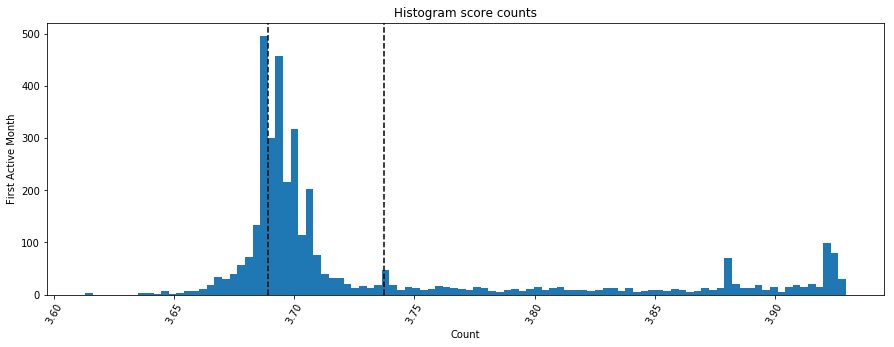

In [147]:
plt.figure(figsize=(15, 5))
plt.hist(df_lb_sorted['Score'][:index_of_last_10_percent].values, bins=100)
plt.title('Histogram score counts')
plt.xlabel('Count')
plt.xticks(rotation=60)
plt.ylabel('First Active Month')
plt.axvline(df_lb_sorted['Score'][:index_of_last_10_percent].iloc[q1_tr], color="k", linestyle="--")
plt.axvline(df_lb_sorted['Score'][:index_of_last_10_percent].iloc[q3_tr], color="k", linestyle="--")
plt.show()

## Submit

In [ ]:
kaggle competitions submit [-h] -c COMPETITION -f FILE -m MESSAGE